### Exercise 9
Load the Fashion MNIST dataset (introduced in Chapter 10); split it into a training set, a validation set, and a test set; shuffle the training set; and save each dataset to multiple TFRecord files. Each record should be a serialized Example protobuf with two features: the serialized image (use tf.io.serialize_tensor() to serialize each image), and the label.⁠ Then use tf.data to create an efficient dataset for each set. Finally, use a Keras model to train these datasets, including a preprocessing layer to standardize each input feature. Try to make the input pipeline as efficient as possible, using TensorBoard to visualize profiling data.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

/Users/nikolaoschachampis/Library/Caches/pypoetry/virtualenvs/handson-ml3-DRIwlIAE-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tf.random.set_seed(42)

Load the dataset with tfds.load() and split it to a train set, a validation set and a test set.

Then shuffle the training set:

In [102]:
train_set, valid_set, test_set = tfds.load(
    name="fashion_mnist",
    split=["train[:90%]", "train[90%:]", "test"],
    shuffle_files=True,
    as_supervised=True
)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 4/4 [00:00<00:00, 123.18 url/s]
Extraction completed...: 0 file [00:00, ? file/s]
Dl Completed...: 100%|██████████| 4/4 [00:00<00:00, 114.86 url/s]
                                                                        

Dataset fashion_mnist downloaded and prepared to /Users/nikolaoschachampis/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [103]:
train_set = train_set.shuffle(buffer_size=10_000, seed=42)

Let's try to see one image:

In [104]:
for item in train_set.take(1):
    print(item)

(<tf.Tensor: shape=(28, 28, 1), dtype=uint8, numpy=
array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 22],
        [ 93],
        [179],
        [217],
        [192],
        [110],
        [106],
        [169],
        [210],
        [186],
        [ 86],
        [ 39],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 98],

2024-05-02 10:20:23.440883: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [105]:
sample = train_set.take(1)
sample

<_TakeDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [106]:
img, label = list(sample.as_numpy_iterator())[0]

2024-05-02 10:20:32.049462: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


(-0.5, 27.5, 27.5, -0.5)

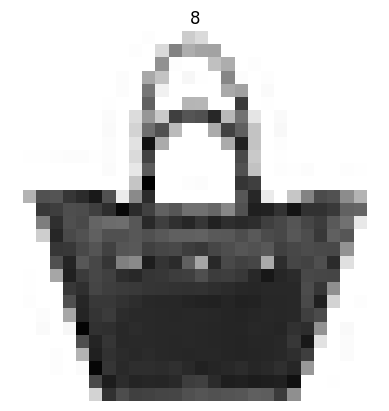

In [107]:
plt.imshow(img, cmap="binary")
plt.title(label)
plt.axis("off")

Now let's try to use the Example protobuf:

In [108]:
data = tf.io.serialize_tensor(img)
data

<tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x04\x12\x0c\x12\x02\x08\x1c\x12\x02\x08\x1c\x12\x02\x08\x01"\x90\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x003%\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00%}R\\]\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00n\x02\x00\x00?R\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00W<\x00\x08\x01\x00y\x03\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00\x89\x0e\x00\x00\x00\x00V_\x00\x05\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x9e\x00\x00JI\x00\x00\xc4\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00#h5\xc0\xaa\xaf\xd8G\x8d\x1a\x00\x05\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00,\x91\xafD\x00\x00T\xbd\xa0;\x00\x07\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00\x1d\xecT\x00\x00\x00\x00

In [109]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

In [110]:
example_with_image = Example(features=Features(feature={
   "image": Feature(bytes_list=BytesList(value=[data.numpy()])),
   "label": Feature(int64_list=Int64List(value=[label])) 
}))
example_with_image

features {
  feature {
    key: "label"
    value {
      int64_list {
        value: 8
      }
    }
  }
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\010\004\022\014\022\002\010\034\022\002\010\034\022\002\010\001\"\220\006\000\000\000\000\000\000\000\000\000\000\002\000\0003%\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\002\000%}R\\]\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000n\002\000\000?R\000\002\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\003\000W<\000\010\001\000y\003\000\002\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\003\000\211\016\000\000\000\000V_\000\005\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\001\000\000\236\000\000JI\000\000\304\000\001\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\004\000#h5\300\252\257\330G\215\032\000\005\000\000\000\000\000\000\000\000\000\000\000\000\0

In [111]:
serialized_example = example_with_image.SerializeToString()
serialized_example

b'\n\xc6\x06\n\x0e\n\x05label\x12\x05\x1a\x03\n\x01\x08\n\xb3\x06\n\x05image\x12\xa9\x06\n\xa6\x06\n\xa3\x06\x08\x04\x12\x0c\x12\x02\x08\x1c\x12\x02\x08\x1c\x12\x02\x08\x01"\x90\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x003%\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00%}R\\]\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00n\x02\x00\x00?R\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00W<\x00\x08\x01\x00y\x03\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00\x89\x0e\x00\x00\x00\x00V_\x00\x05\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x9e\x00\x00JI\x00\x00\xc4\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00#h5\xc0\xaa\xaf\xd8G\x8d\x1a\x00\x05\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00,\x91\xafD\x00\x00T\xbd\xa0;\x00\x07\x00\x00\x00\x00\x00\x00\

Okay, now we need to convert the entire train dataset to Examples:

In [112]:
def convert_to_example(img, label):
    # img, label = train_item
    data = tf.io.serialize_tensor(img)
    example = Example(features=Features(feature={
        "image": Feature(bytes_list=BytesList(value=[data.numpy()])),
        "label": Feature(int64_list=Int64List(value=[label])) 
    }))
    return example.SerializeToString()

In [113]:
convert_to_example(img, label)

b'\n\xc6\x06\n\x0e\n\x05label\x12\x05\x1a\x03\n\x01\x08\n\xb3\x06\n\x05image\x12\xa9\x06\n\xa6\x06\n\xa3\x06\x08\x04\x12\x0c\x12\x02\x08\x1c\x12\x02\x08\x1c\x12\x02\x08\x01"\x90\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x003%\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00%}R\\]\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00n\x02\x00\x00?R\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00W<\x00\x08\x01\x00y\x03\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00\x89\x0e\x00\x00\x00\x00V_\x00\x05\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x9e\x00\x00JI\x00\x00\xc4\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00#h5\xc0\xaa\xaf\xd8G\x8d\x1a\x00\x05\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00,\x91\xafD\x00\x00T\xbd\xa0;\x00\x07\x00\x00\x00\x00\x00\x00\

In [114]:
from pathlib import Path

mnist_dir = Path() / "datasets" / "fashion_mnist"
mnist_dir.mkdir(parents=True, exist_ok=True)
filename_format = "fashion_mnist_train_{:02d}.tfrecord"

In [115]:
filepaths = [str(mnist_dir / filename_format.format(index)) for index in range(20)]
filepaths

['datasets/fashion_mnist/fashion_mnist_train_00.tfrecord',
 'datasets/fashion_mnist/fashion_mnist_train_01.tfrecord',
 'datasets/fashion_mnist/fashion_mnist_train_02.tfrecord',
 'datasets/fashion_mnist/fashion_mnist_train_03.tfrecord',
 'datasets/fashion_mnist/fashion_mnist_train_04.tfrecord',
 'datasets/fashion_mnist/fashion_mnist_train_05.tfrecord',
 'datasets/fashion_mnist/fashion_mnist_train_06.tfrecord',
 'datasets/fashion_mnist/fashion_mnist_train_07.tfrecord',
 'datasets/fashion_mnist/fashion_mnist_train_08.tfrecord',
 'datasets/fashion_mnist/fashion_mnist_train_09.tfrecord',
 'datasets/fashion_mnist/fashion_mnist_train_10.tfrecord',
 'datasets/fashion_mnist/fashion_mnist_train_11.tfrecord',
 'datasets/fashion_mnist/fashion_mnist_train_12.tfrecord',
 'datasets/fashion_mnist/fashion_mnist_train_13.tfrecord',
 'datasets/fashion_mnist/fashion_mnist_train_14.tfrecord',
 'datasets/fashion_mnist/fashion_mnist_train_15.tfrecord',
 'datasets/fashion_mnist/fashion_mnist_train_16.tfrecord

In [118]:
from contextlib import ExitStack

def write_tfrecords(name, dataset, n_shards=10):
    filename_format = "fashion_mnist_{}_{:02d}.tfrecord"
    paths = [str(mnist_dir / filename_format.format(name, index)) for index in range(n_shards)]
    with ExitStack() as stack:
        writers = [stack.enter_context(tf.io.TFRecordWriter(path))
                   for path in paths]
        for index, (image, label) in dataset.enumerate():
            shard = index % n_shards
            example = convert_to_example(image, label)
            writers[shard].write(example)
    return paths

In [119]:
train_filepaths = write_tfrecords("train", train_set)

2024-05-02 10:27:05.274266: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


In [120]:

valid_filepaths = write_tfrecords("valid", train_set)
test_filepaths = write_tfrecords("test", train_set)

2024-05-02 10:28:18.411011: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2024-05-02 10:28:24.221281: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


Okay, now let's load the dataset from the tfrecord files:

In [123]:
loaded_train_set = tf.data.TFRecordDataset(train_filepaths)

In [124]:
for item in loaded_train_set.take(1):
    print(item)

tf.Tensor(b'\n\xc6\x06\n\x0e\n\x05label\x12\x05\x1a\x03\n\x01\x03\n\xb3\x06\n\x05image\x12\xa9\x06\n\xa6\x06\n\xa3\x06\x08\x04\x12\x0c\x12\x02\x08\x1c\x12\x02\x08\x1c\x12\x02\x08\x01"\x90\x06\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00znR\x93U\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00Ld\xdc\xfe\xea\xf0\xcf_3\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xbb\xe5\xbf\xb2\xe1\xe3\xcb\xa2\xd3\xdd\x92\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00l\xec\xc8\xc6\xbf\xc4\xe4\xb1\xca\xc7\xc9\xe12\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa2\xe2\xdf\xd4\xbb\xc8\xe0\xb6\xcc\xdd\xd7\xd6l\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xcc\xe7\xe2\xe5\xdd\xdb\xe2\xd7\xe5\xdf\xde\xd9\x9d\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc5\xeb\xe8\xdf\xe5\xe3\xe5\xe6\xe1\xe0\xea\xdb\xc0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xcd\xea\xe5\xe4\xe2\xe0\x

In [125]:
feature_description = {
    "image": tf.io.VarLenFeature(tf.string),
    "label": tf.io.FixedLenFeature(shape=[], dtype=tf.int64, default_value=0)
}


In [126]:
parsed = tf.io.parse_single_example(item, feature_description)
parsed

{'image': SparseTensor(indices=tf.Tensor([[0]], shape=(1, 1), dtype=int64), values=tf.Tensor([b'\x08\x04\x12\x0c\x12\x02\x08\x1c\x12\x02\x08\x1c\x12\x02\x08\x01"\x90\x06\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00znR\x93U\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00Ld\xdc\xfe\xea\xf0\xcf_3\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xbb\xe5\xbf\xb2\xe1\xe3\xcb\xa2\xd3\xdd\x92\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00l\xec\xc8\xc6\xbf\xc4\xe4\xb1\xca\xc7\xc9\xe12\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa2\xe2\xdf\xd4\xbb\xc8\xe0\xb6\xcc\xdd\xd7\xd6l\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xcc\xe7\xe2\xe5\xdd\xdb\xe2\xd7\xe5\xdf\xde\xd9\x9d\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc5\xeb\xe8\xdf\xe5\xe3\xe5\xe6\xe1\xe0\xea\xdb\xc0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xcd\xea\xe5\xe4\xe2\xe0\xe6\xe3\xe1\xdd\xec\xdc

In [127]:
parsed["image"].values[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x04\x12\x0c\x12\x02\x08\x1c\x12\x02\x08\x1c\x12\x02\x08\x01"\x90\x06\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00znR\x93U\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00Ld\xdc\xfe\xea\xf0\xcf_3\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xbb\xe5\xbf\xb2\xe1\xe3\xcb\xa2\xd3\xdd\x92\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00l\xec\xc8\xc6\xbf\xc4\xe4\xb1\xca\xc7\xc9\xe12\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa2\xe2\xdf\xd4\xbb\xc8\xe0\xb6\xcc\xdd\xd7\xd6l\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xcc\xe7\xe2\xe5\xdd\xdb\xe2\xd7\xe5\xdf\xde\xd9\x9d\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc5\xeb\xe8\xdf\xe5\xe3\xe5\xe6\xe1\xe0\xea\xdb\xc0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xcd\xea\xe5\xe4\xe2\xe0\xe6\xe3\xe1\xdd\xec\xdc\xda\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [128]:
tf.io.parse_tensor(parsed["image"].values[0], out_type=tf.uint8)

<tf.Tensor: shape=(28, 28, 1), dtype=uint8, numpy=
array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  4],
        [  0],
        [  0],
        [  0],
        [122],
        [110],
        [ 82],
        [147],
        [ 85],
        [  0],
        [  0],
        [  0],
        [  1],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  4],
        [  0],
        [  0],
        [ 76],
        [100],
        [220],
        [254],
        [234],
        [240],
        [207],
        [ 95],
        [ 51],
        [  0],
        [  0],
        [  1],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],


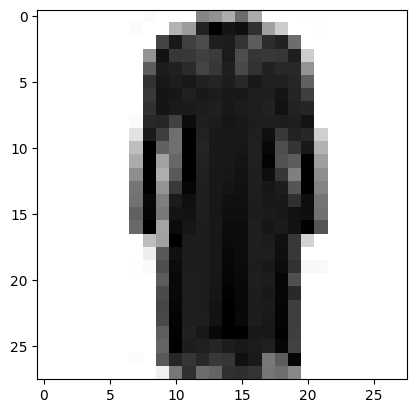

In [129]:
parsed_img = tf.io.parse_tensor(parsed["image"].values[0], out_type=tf.uint8)
plt.imshow(parsed_img, cmap="binary")

In [130]:
for index, item in loaded_train_set.enumerate():
    pass
index

2024-05-02 10:41:27.217723: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


<tf.Tensor: shape=(), dtype=int64, numpy=53999>

Let's try to load the dataset reading multiple files in parallel and interleaving their records:

In [131]:
n_readers = 5
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)
loaded_train_set = filepath_dataset.interleave(
    lambda filepath: tf.data.TFRecordDataset(filepath),
    cycle_length=n_readers,
    num_parallel_calls=tf.data.AUTOTUNE
)

In order to use the dataset in training, we have to parse each TFRecord to get the
underlying numpy array (tensor to be exact).

So we have to use .map() to call a parsing function for each record. This function does the same things as we did a few cells before:

In [132]:
def parse(tfrecord):
    feature_descriptions = {
        "image": tf.io.FixedLenFeature([], tf.string, default_value=""),
        "label": tf.io.FixedLenFeature([], tf.int64, default_value=-1)
    }
    example = tf.io.parse_single_example(tfrecord, feature_descriptions)
    image = tf.io.parse_tensor(example["image"], out_type=tf.uint8)
    #image = tf.io.decode_jpeg(example["image"])
    image = tf.reshape(image, shape=[28, 28]) # it's (28, 28, 1) initially
    return image, example["label"]

Finally, let's write a function that will create an efficient dataset for training, validation and testing.

This is copied from the solutions notebook with a few modifications.

It loads the dataset reading from multiple files in parallel and interleaving their records. Then, it parses the examples into tensors, caches the records, shuffles, batches and prefetches:

In [135]:
def fashion_mnist_dataset(filepaths, n_readers=5, shuffle_buffer_size=None,
                  n_parse_threads=5, batch_size=32, cache=False):
    filepath_dataset = tf.data.Dataset.list_files(filepaths, seed=42)
    dataset = filepath_dataset.interleave(
        lambda filepath: tf.data.TFRecordDataset(filepath),
        cycle_length=n_readers,
        num_parallel_calls=tf.data.AUTOTUNE
    )
    # dataset = tf.data.TFRecordDataset(filepaths,
    #                                   num_parallel_reads=n_readers)
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(parse, num_parallel_calls=n_parse_threads)
    dataset = dataset.batch(batch_size)
    return dataset.prefetch(1)

In [136]:
train_set = fashion_mnist_dataset(train_filepaths, shuffle_buffer_size=60_000)


In [137]:
valid_set = fashion_mnist_dataset(valid_filepaths, cache=True)
test_set = fashion_mnist_dataset(test_filepaths, cache=True)

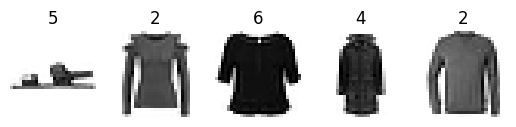

In [138]:
for X, y in train_set.take(1):
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(X[i].numpy(), cmap="binary")
        plt.axis("off")
        plt.title(str(y[i].numpy()))

Nice. Now we can build the model and train it.

But we should include a Normalization layer:

In [140]:
tf.random.set_seed(42)

standardization = tf.keras.layers.Normalization(input_shape=[28, 28])

# First we take a sample and we throw away the labels.
# Each item in the train_set is a batch, so we use the concatenate() call
# to "unbatch" the images
sample_image_batches = train_set.take(100).map(lambda image, label: image) # 100 batches
sample_images = np.concatenate(list(sample_image_batches.as_numpy_iterator()),
                               axis=0).astype(np.float32)
standardization.adapt(sample_images)

model = tf.keras.Sequential([
    standardization,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="swish"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam", metrics=["accuracy"])

In [142]:
from datetime import datetime

logs = Path() / "my_logs" / "exercises" / "chapter_13" / "exercise_9" / "run_" / datetime.now().strftime("%Y%m%d_%H%M%S")

tensorboard_cb = tf.keras.callbacks.TensorBoard(
    log_dir=logs, histogram_freq=1, profile_batch=10)

model.fit(train_set, epochs=10, validation_data=valid_set,
          callbacks=[tensorboard_cb])

Epoch 1/10


2024-05-02 11:50:09.055574: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-05-02 11:50:09.055589: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-05-02 11:50:09.055872: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


     35/Unknown - 0s 6ms/step - loss: 0.1735 - accuracy: 0.9321

2024-05-02 11:50:09.328945: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-05-02 11:50:09.328962: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-05-02 11:50:09.337711: I tensorflow/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-05-02 11:50:09.338814: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-05-02 11:50:09.339068: I tensorflow/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: my_logs/exercises/chapter_13/exercise_9/run_/20240502_115009/plugins/profile/2024_05_02_11_50_09/Nikolaoss-MacBook-Pro.local.xplane.pb


   1687/Unknown - 9s 5ms/step - loss: 0.1654 - accuracy: 0.9380

2024-05-02 11:50:18.366820: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 7388340394555087188
2024-05-02 11:50:18.366832: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13396768856360770618
2024-05-02 11:50:18.366839: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 17443740519751528799
2024-05-02 11:50:18.366843: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 7584566219725476949
2024-05-02 11:50:18.366849: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15620364428621023047
2024-05-02 11:50:18.366852: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6254723369889860293
2024-05-02 11:50:18.366860: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv 

1688/1688 [==============================] - 14s 8ms/step - loss: 0.1654 - accuracy: 0.9380 - val_loss: 0.1457 - val_accuracy: 0.9461
Epoch 2/10


2024-05-02 11:50:22.924122: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15372606543132455385
2024-05-02 11:50:22.924150: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 452927907927380297
2024-05-02 11:50:22.924163: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14320882161159754335
2024-05-02 11:50:22.924175: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4226125124477953779


1688/1688 [==============================] - 14s 8ms/step - loss: 0.1580 - accuracy: 0.9420 - val_loss: 0.1342 - val_accuracy: 0.9503
Epoch 3/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1509 - accuracy: 0.9426 - val_loss: 0.1580 - val_accuracy: 0.9420
Epoch 4/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1417 - accuracy: 0.9471 - val_loss: 0.1164 - val_accuracy: 0.9580
Epoch 5/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1371 - accuracy: 0.9497 - val_loss: 0.1181 - val_accuracy: 0.9567
Epoch 6/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1298 - accuracy: 0.9513 - val_loss: 0.1151 - val_accuracy: 0.9579
Epoch 7/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1266 - accuracy: 0.9528 - val_loss: 0.1042 - val_accuracy: 0.9616
Epoch 8/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1220 - accuracy: 0.9539 - val_loss: 0.1007 - val_accuracy: 0.9

Tough exercise!